<a href="https://colab.research.google.com/github/7twik/GoogleColab/blob/main/glass_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df=pd.read_csv('/content/glassdata.csv')

In [4]:
data_file_path='/content/glassdata.csv'
headers_file_path='/content/header.csv'

headers=pd.read_csv(headers_file_path, header=None)
headers=headers.squeeze().tolist()

df=pd.read_csv(data_file_path, header=None, names=headers)

In [5]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [6]:
null_columns=df.columns[df.isnull().any()]

In [7]:
df.drop(df[null_columns].isnull().sum())

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [8]:
df[df.duplicated(subset=None,keep=False)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [9]:
import matplotlib.pyplot as plt

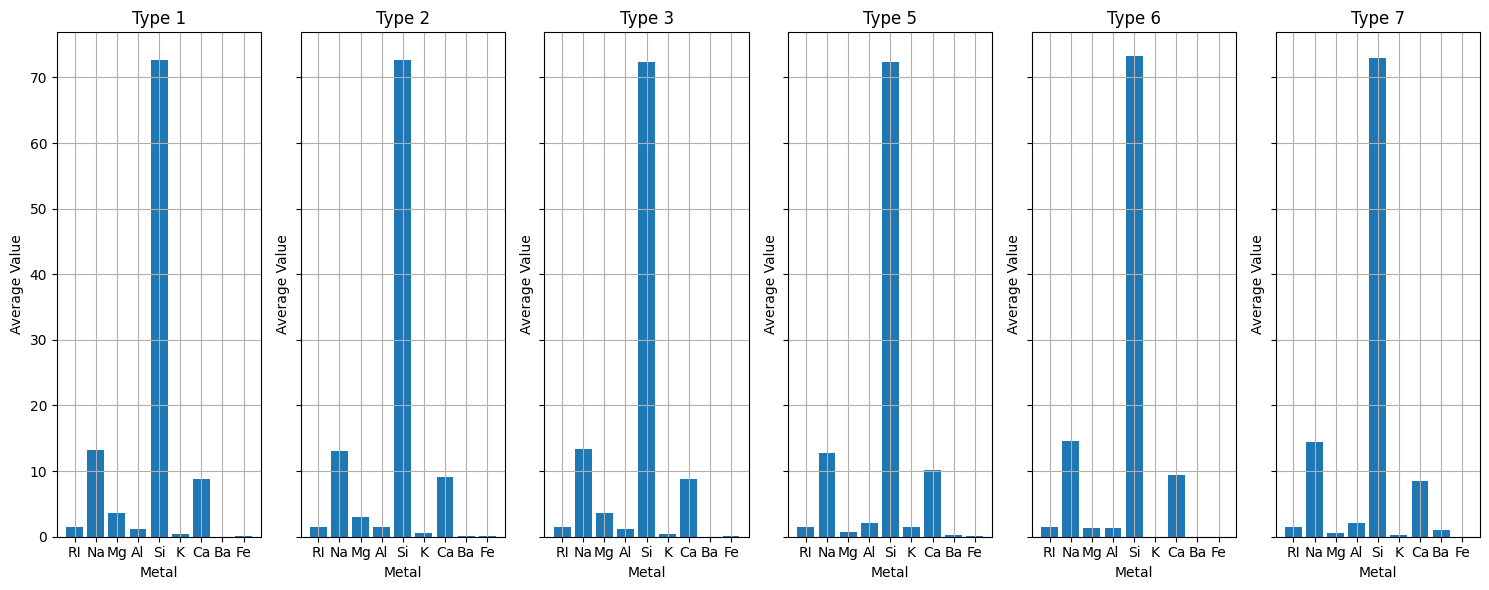

In [13]:
grouped = df.groupby('Type_of_glass')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(grouped), figsize=(15, 6), sharey=True)

# Plotting
for i, (name, group) in enumerate(grouped):
    axes[i].bar(group.columns[:-1], group.mean()[:-1])
    axes[i].set_title(f'Type {name}')
    axes[i].set_xlabel('Metal')
    axes[i].set_ylabel('Average Value')
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

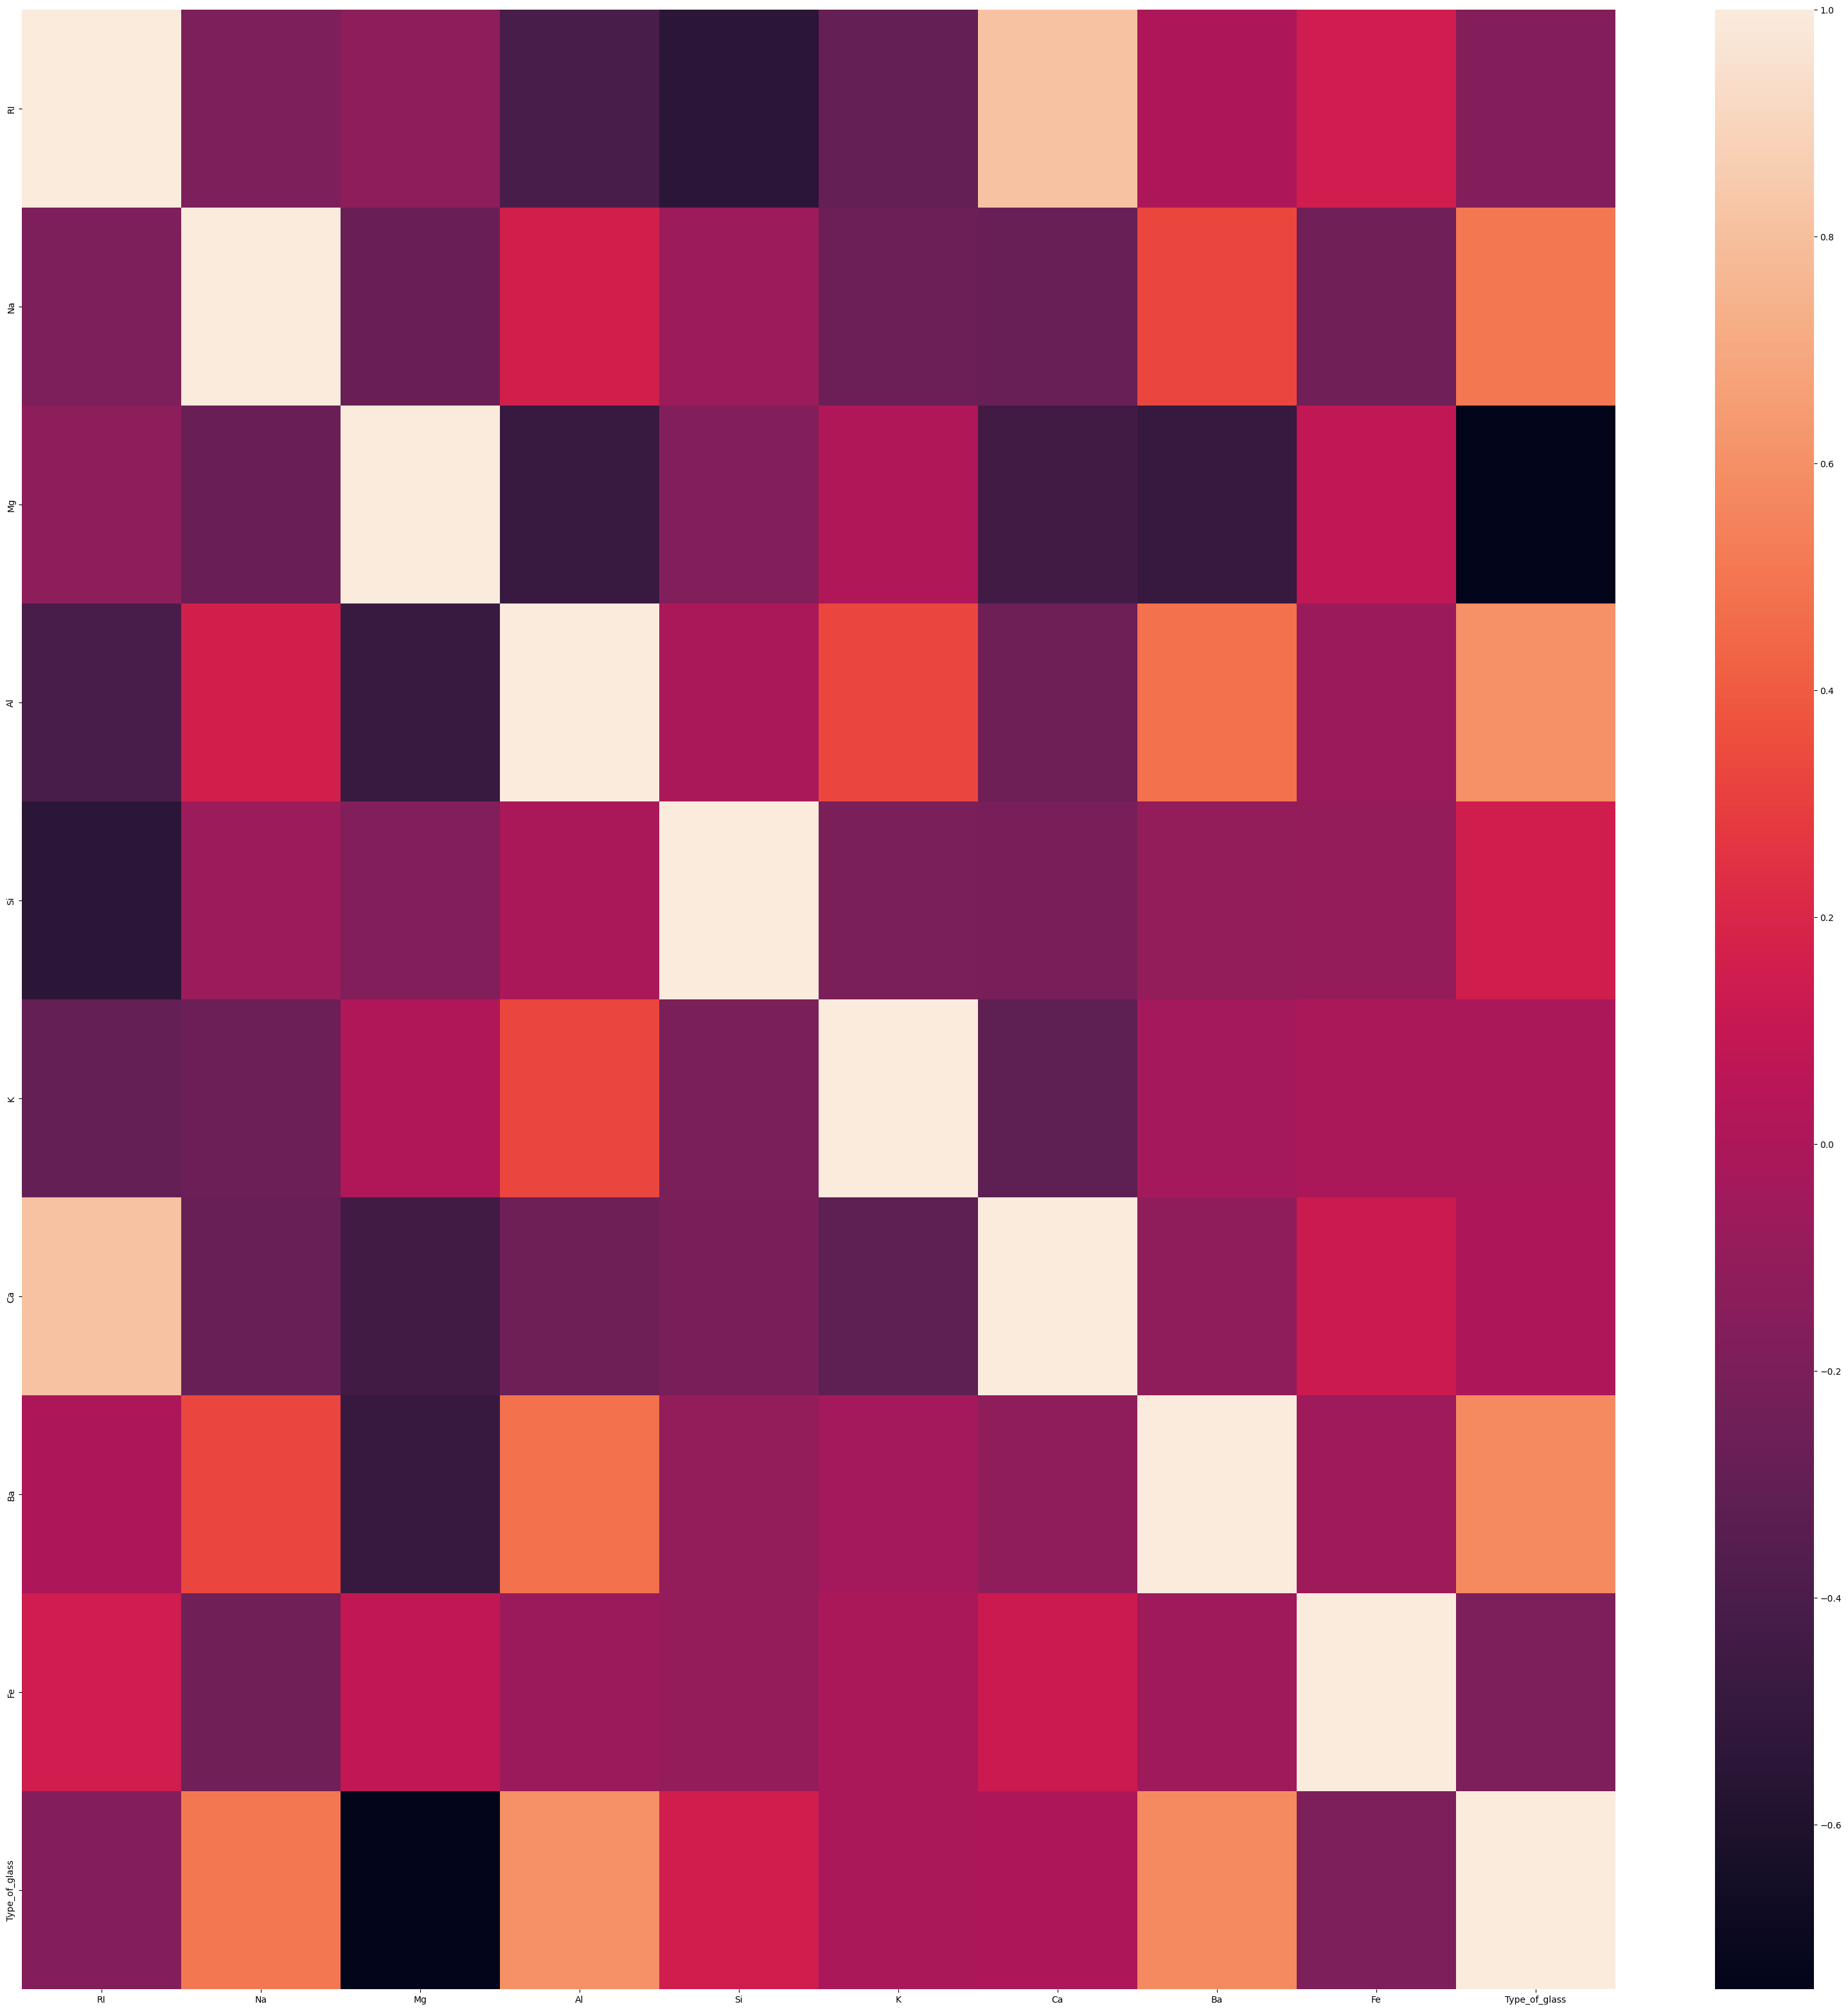

In [14]:
import seaborn as sns
plt.figure(figsize=(40,40))
sns.heatmap(df.corr())
plt.show()

In [15]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [21]:
from collections import Counter
count=Counter(df['Type_of_glass'])
count.items()

dict_items([(1, 70), (2, 76), (3, 17), (5, 13), (6, 9), (7, 29)])